In [1]:
from IPython.display import Image, display

# Perceptrón Multicapa (PMC)
La figura a continuación, muestra una red neuronal de 3 capas:
- Capa de entrada _(in)_, no se cuenta como capa en sí y corresponde a los datos de entrada
- Capa oculta _(h)_
- Capa de salida _(o)_


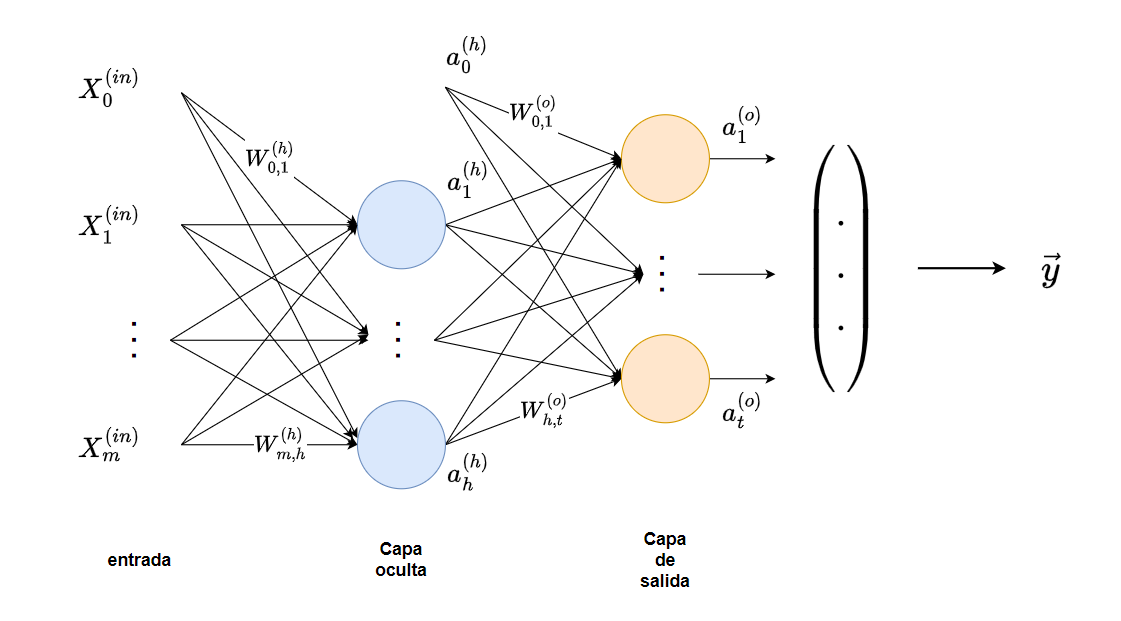

In [2]:
display(Image(filename='./2_imagenes/MLP.png', width=800))

Llamamos a la salida del _i-ésimo_ nodo en la _l-ésima_ capa: $a_i^{(l)}$.

$X_0^{(in)}$ y $a_0^{(h)}$ son las **unidades de bias** los cuales igualamos a 1.

Cada nodo en la capa $l$ está conectado a todos los nodos en la capa  $l+1$ a través de un coeficiente de la matriz de pesos. Como ejemplo, la conexión entre el _k-ésimo_ nodo en la capa $l$ al _j-ésimo_ nodo en la capa $l+1$ sería $w_{k,j}^{(l)}$. Cuando todas las neuronas en una capa están conectadas a cada neurona de la capa anterior, la capa se denomina _densa_ o _fully connected_.

Denominamos $W^{(h)}$ la matriz de pesos que conecta las entradas con la capa oculta y $W^{(o)}$ la matriz de pesos que conecta una capa oculta a la capa de salida.

La matriz de pesos $W^{(h)}$ tiene dimensiones $d$ x $m$ donde _d_ es el número de nodos de la capa oculta y _m_ es el número de entradas mas la unidad de bias.

## Algoritmo de entrenamiento de un Perceptrón Multicapa

1. Iniciando en la capa de entrada, propagamos hacia adelante los datos de entrenamiento a través de la red para obtener la salida.
2. En base a la salida de la red, calculamos el error que queremos minimizar usando una función de costo.
3. Hacemos la retropropagación del error, hallamos su derivada respecto a cada uno de los pesos en la red y actualizamos los pesos.

Después de repetir estos pasos y los pesos convergen, hacemos la propagación hacia adelante para obtener la salida de la red y aplicamos una función umbral para obtener la predicción de la etiqueta de clase.

## Funciones de activación

Para que el algoritmo de retropropagación funcione correctamente, es necesario cambiar las funciones de activación de cada perceptrón con la función logística.

Existen funciones de activación adicionales que funcionan muy bien con el algoritmo:

**Función Logística o Sigmoidea:** función continua y diferenciable en forma de 'S'. Sus valores de salida varían entre 0 y 1.

$$\sigma(z) = \frac{1}{(1 + exp(-z))}$$

**Función tangente hiperbólica:** similar a la anterior pero sus valores de salida varían entre -1 y 1.

$$\tanh(z) = 2\sigma(2z) -1$$

**Función unidad lineal rectificada (ReLU)** es continua pero no diferenciable en z=0, su derivada es 0 para $z<0$.

$$ReLU(z) = max(0,z)$$

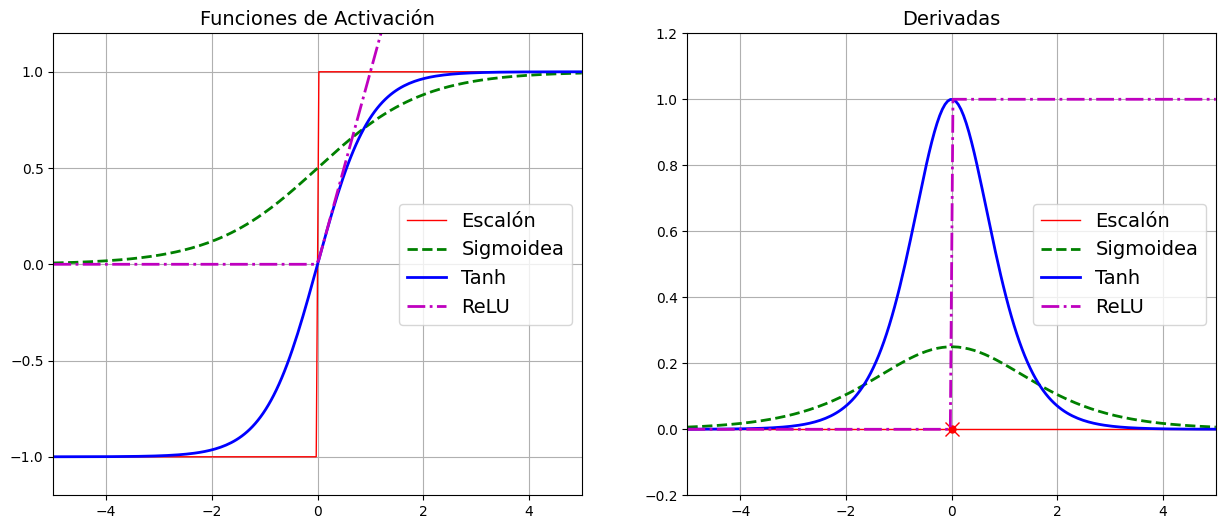

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Escalón")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoidea")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Funciones de Activación", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Escalón")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoidea")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Derivadas", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

### Uso de la clase _MLPClassifier_ de sklearn

A continuación vamos a utilizar la clase _MLPClassifier_ para resolver el problema del XOR.

Los datos de entrada (X) y salida (y) se encuentran en el archivo `datos_xor.mat` en la carpeta "data"

In [4]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

**cargamos y graficamos los datos**

In [5]:
# Cargamos los datos en variables de entrada (X) y salida (y)
datos_mat = sio.loadmat("./1_datos/datos_xor.mat")
#----------------------------------------------------------

print(datos_mat.keys())

x = datos_mat["X"] 
y = datos_mat["Y"] #.reshape(-1)

print("X: ",x.shape) # (80,2)
print("Y: ",y.shape) # (80,1)

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Y'])
X:  (80, 2)
Y:  (1, 80)


In [6]:
#Modificamos las etiquetas de clase para tener clases 0 y 1
datos_mat["Y"] = np.where(datos_mat["Y"] == 0.1, 0, 1)

y = datos_mat['Y'].reshape(-1) #esta como una lista de lista dentro del array, lo cual no es conveniente

In [7]:
carac_1 = x[:, 0]  # Primera característica
carac_2 = x[:, 1]  # Segunda característica

print(carac_2,"\n")
print(carac_1)

[1.92245094e-01 1.92635518e-01 2.40005533e-02 9.56579884e-01
 8.58096366e-01 9.73660373e-01 9.98311522e-01 2.71417055e-02
 8.28137031e-01 1.27997239e-02 9.40231863e-01 9.09999815e-01
 1.22624897e-01 9.69800048e-01 1.21174975e-01 8.35626709e-02
 8.66082780e-01 9.12316813e-01 9.76832968e-01 5.23483840e-02
 1.66290917e-01 1.13942533e-01 4.35619925e-02 8.12041461e-01
 8.28499001e-01 9.93221641e-04 2.90371915e-02 9.51200764e-03
 1.90928911e-01 9.88549173e-01 1.75092693e-02 4.54480648e-02
 8.65472463e-01 9.11956630e-01 7.12961884e-03 8.79560043e-01
 9.47279853e-01 8.42818828e-01 6.73922146e-02 2.00028683e-02
 8.51518438e-01 9.01093236e-02 1.54781679e-01 9.90249411e-01
 8.14023595e-01 8.24849734e-02 1.80959258e-01 9.37461409e-01
 9.38819021e-02 1.09261948e-01 9.14408666e-01 8.28708966e-01
 9.03223797e-01 1.69438440e-01 1.17576147e-01 1.90547691e-02
 1.18985362e-01 1.78900850e-01 5.35124090e-02 1.68597779e-01
 8.87651681e-01 8.18050738e-01 9.82363477e-02 8.65354705e-01
 8.73492329e-01 8.131828

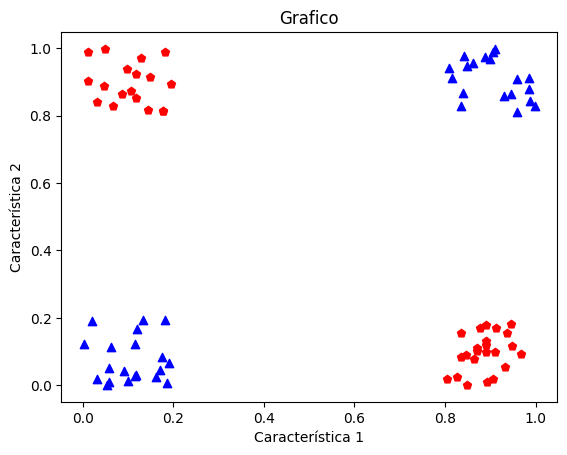

In [8]:
#separamos las caracteristicas
carac_1 = x[:, 0] 
carac_2 = x[:, 1]

#Graficamos
plt.scatter(carac_1[y == 0], carac_2[y == 0], color="blue", marker="^", label="Clase 0")
plt.scatter(carac_1[y == 1], carac_2[y == 1], color="red", marker="p", label="Clase 1")

# Etiquetas de los ejes
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.title("Grafico")# Título
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True) # sin stratify=y

Entrenamos un clasificador _MLPClassifier_ con una capa oculta de 2 neuronas.

Use una función de activación sigmoidea ('logistic')  y un coeficiente de aprendizaje entre `0.1` y `0.5`.

Ver la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) de la clase.

In [10]:
from sklearn.neural_network import MLPClassifier
n = np.random.randint(100)
print(n) 
#Desconozco para que seria el n= random
#---------------------------------------------------------
clasificador = MLPClassifier(hidden_layer_sizes=(2), activation="logistic", learning_rate_init=0.1, random_state=1)

#Entrenamos
clasificador.fit(X_train, y_train)

67


MLPClassifier(activation='logistic', hidden_layer_sizes=2,
              learning_rate_init=0.1, random_state=1)

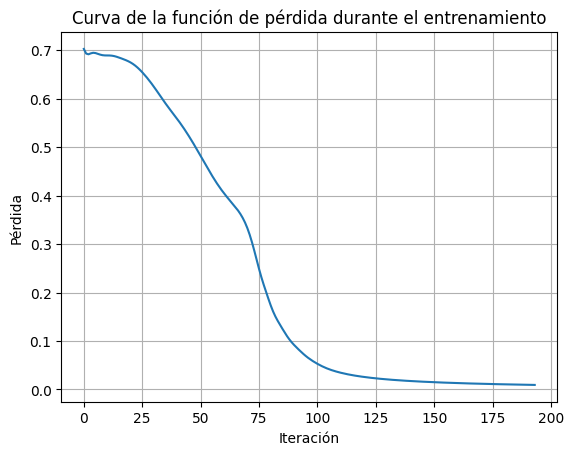

Precisión en el conjunto de prueba:  1.0


In [11]:
#Grafico de curva de la función de pérdida
plt.plot(clasificador.loss_curve_)
plt.title("Curva de la función de pérdida durante el entrenamiento")
plt.xlabel("Iteración")
plt.ylabel("Pérdida")
plt.grid(True)
plt.show()

#Evaluamos el accuracy
from sklearn.metrics import accuracy_score
y_pred = clasificador.predict(X_test)
precision = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba: ",precision)

Como vimos en clase de teoría. Las neuronas en la capa oculta, estarían realizando una transformación. Es decir, mapean el espacio de entrada (X) a un nuevo espacio (X') donde los datos pueden ser linealmente separados por el nodo en la capa de salida.

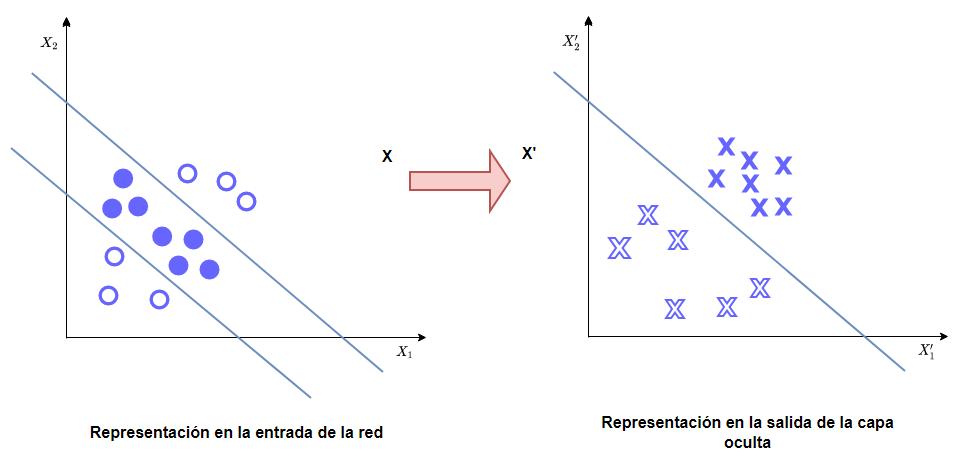

In [12]:
display(Image(filename='./2_imagenes/PMC_transformacion.png', width=1000))

Con los pesos de la capa oculta $w_h$ podemos obtener dos rectas que separan la representación de los datos entrada.

Podemos obtener las rectas a la salida de la capa oculta a partir de estos pesos $w_h$, de forma similar como hacíamos con el perceptrón simple:

$$\begin{pmatrix}1\\x_1\\x_2\end{pmatrix} \begin{pmatrix}w_{01}&w_{11}&w_{21}\\ w_{02}&w_{12}&w_{22}\\ \end{pmatrix} = 0$$

Esto nos dará como resultado dos rectas, de las cuales despejamos la pendiente y ordenada para graficarlas
$$ w_{01} + x_1 w_{11} + x_2 w_{21} = 0$$
$$ w_{02} + x_1 w_{12} + x_2 w_{22} = 0$$

### Obtener los coeficientes de los pesos de la capa oculta (Ver Documentación) y la capa de salida para graficar las rectas

Pesos de la capa oculta: [[ -9.89362249  -6.49402159]
 [-10.16067341  -6.52382798]]
Pesos de la capa oculta a la capa de salida: [[-11.34517158]
 [ 10.9925479 ]]
Interceptos de la capa oculta: [5.66989506 9.04137816]
Interceptos de la capa de salida: [-5.11223749]


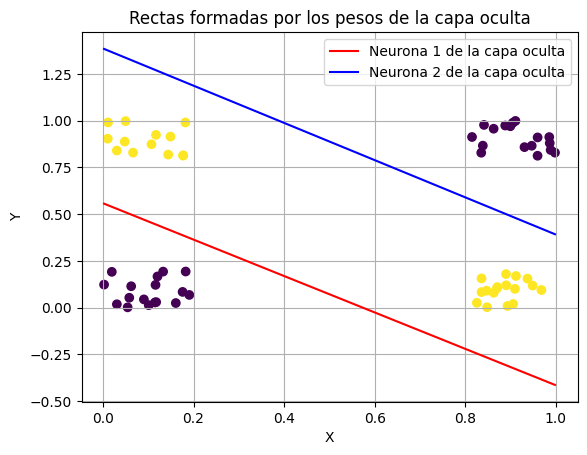

In [22]:
# Obtenga los parámetros de las rectas (pendiente y ordenada) que se forman con los pesos w_h de la capa oculta
#---------------------------------------------------------------------------
pesos_ocultos = clasificador.coefs_[0] #pesos entre la capa de entrada y la capa oculta
pesos_oculta_a_salida = clasificador.coefs_[1]  # pesos entre la capa oculta y la capa de salida
interceptos_ocultos = clasificador.intercepts_[0] #interceptos de la capa oculta
interceptos_salida = clasificador.intercepts_[1]  # interceptos de la capa de salida

print("Pesos de la capa oculta:", pesos_ocultos)
print("Pesos de la capa oculta a la capa de salida:", pesos_oculta_a_salida)
print("Interceptos de la capa oculta:", interceptos_ocultos)
print("Interceptos de la capa de salida:", interceptos_salida)

# Grafique las 2 rectas junto a los datos
#------------------------------------------------------------------------------------

#Calculamos las pendientes y las ordenadas al origen
pendiente_oculta_neurona1 = -pesos_ocultos[0][0] / pesos_ocultos[1][0] #Se calcula la pendiente de la recta que representa la primera neurona de la capa oculta
ordenada_oculta_neurona1 = -interceptos_ocultos[0] / pesos_ocultos[1][0] #Se calcula la ordenada al origen de la recta que representa la primera neurona de la capa oculta

#se hace lo mismo con la segunda neurona
pendiente_oculta_neurona2 = -pesos_ocultos[0][1] / pesos_ocultos[1][1]
ordenada_oculta_neurona2 = -interceptos_ocultos[1] / pesos_ocultos[1][1]

#Graficamos las rectas correspondientes a las neuronas de la capa oculta
x_vals = np.linspace(min(x[:, 0]), max(x[:, 0]), 100)#Generamos 100 valores para el eje x, desde el valor mínimo hasta el máximo de la primera característica

# se hace la formula y=mx+b
y_vals1 = pendiente_oculta_neurona1 * x_vals + ordenada_oculta_neurona1
y_vals2 = pendiente_oculta_neurona2 * x_vals + ordenada_oculta_neurona2

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis") #"viridis" es para los colores
plt.plot(x_vals, y_vals1, label="Neurona 1 de la capa oculta", color="red")
plt.plot(x_vals, y_vals2, label="Neurona 2 de la capa oculta", color="blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Rectas formadas por los pesos de la capa oculta")
plt.legend()
plt.grid()
plt.show()

### Visualizando los datos transformados

Para visualizar los datos transformados $\vec{a}^{(h)}$, debemos aplicar la función de activación $\phi()$ a la combinación lineal de las entradas y los pesos de la capa oculta $\vec{z}^{(h)}$ (una vez la red está entrenada)

$$ \vec{z}^{(h)} = \vec{x}^{(in)}.(\vec{W}^{(h)})^T $$

$$ \vec{a}^{(h)} = \phi(\vec{z}^{(h)})$$

$\vec{x}^{(in)}$ corresponde a los datos de entrada X mas el bias

In [14]:
def logistic(z):
    return 1 / (1 + np.exp(-z))

Aplica la función de activación (en este caso, la logística) a la combinación lineal de las entradas y los pesos de la capa oculta para transformar los datos y grafique los datos obtenidos.

In [15]:
# Grafique la salida de la capa oculta




### Se debe observar que ahora los datos a la salida de la capa oculta son linealmente separables
Ahora la frontera de decisión podemos encontrarla de la misma forma que hicimos con el perceptrón simple, excepto que esta vez trabajamos con un espacio _X'_ resultado de la transformación:

$$ w_0^{(o)} + x_1' w_1^{(o)} + x_2' w_2^{(o)} = 0$$

$w^{(o)}$ corresponde a los pesos en el nodo de salida

In [16]:
# Con los pesos del nodo en la capa de salida, armar la recta que separe
# los datos en el campo transformado
# --------------------------------------------------------------------------------------------------------



# Graficar los datos transformados y la recta
#-----------------------------------------------------------------------


### Ahora vamos a entrenar un PMC para resolver el problema de la siguiente figura:

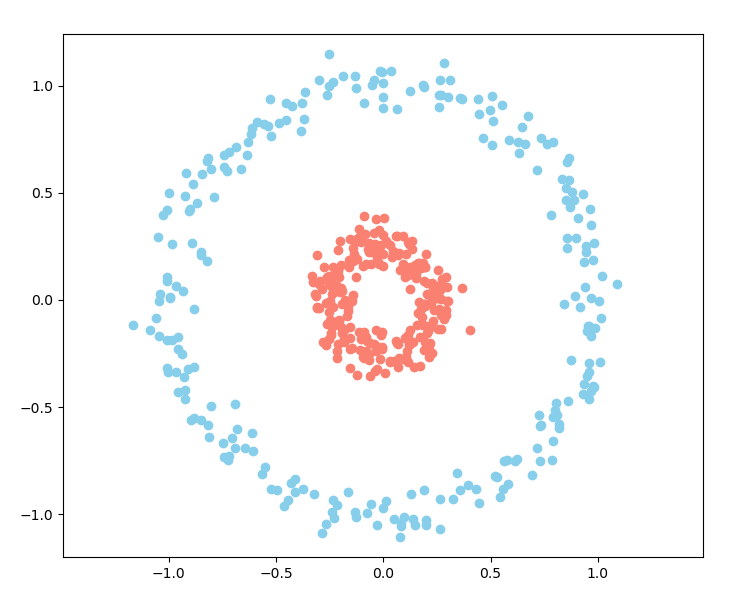

In [17]:
display(Image(filename='./2_imagenes/circle.png', width=700))

In [18]:
# Cargue los datos en variables de entrada (X) y salida (y)
#----------------------------------------
datos_mat = sio.loadmat('./1_datos/datos_circle.mat')


# print("X: ",X.shape) #(500, 2)
# print("y: ",y.shape) #(500, 1)

In [19]:
# Graficar los datos
#-----------------------------------------------------------------------------



### Entrene un PMC

### Una vez entrenada la red usar la función **plot_decision_regions**  para graficar la frontera de decisión.

In [20]:
#Graficar usando plot_decision_regions
from modulos.graficacion import plot_decision_regions



### Analice cómo sería la transformación de los datos en la capa oculta para este ejercicio

- En qué dimensión están los datos luego de la transformación de la capa oculta. Cómo es la función que separa los datos? De forma opcional puede realizar la transformación y graficarla.